- Here, we attempt to use Triangulated Irregular Network (TIN) modeling to reconstruct a volume using a set of cloud points in 3D space. TIN involves constructing a mesh of triangular facets to represent the surface of the object. The vertices of the triangles are defined by the points in the point cloud, and the surface is then approximated by connecting these points with triangular facets.

<br>

- TIN modeling is a good option for fitting a surface to a set of point clouds in 3 dimensions, and below, we implement it using some Python libraries such as scikit-learn or PySurfer.

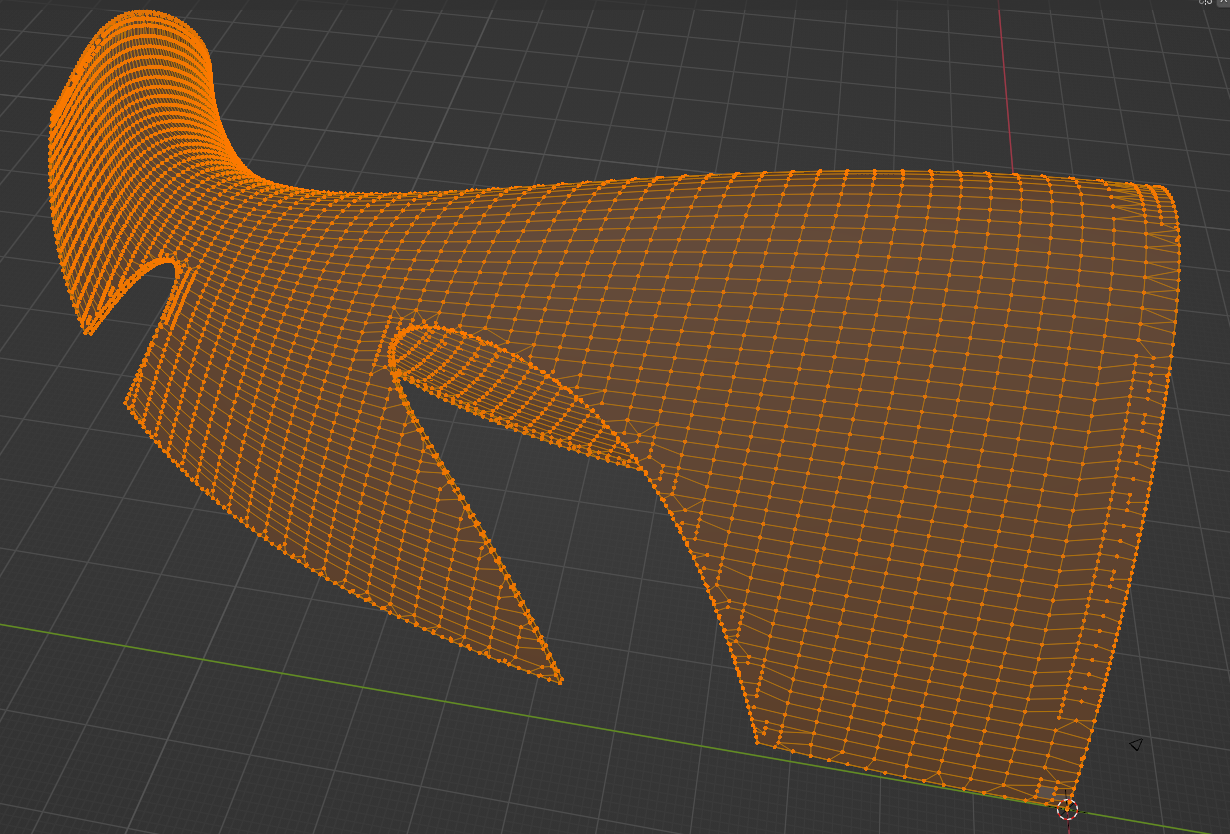

In [8]:
# Install necessary modules

#!pip install numpy_stl
!pip install plyer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.3/142.3 KB 4.6 MB/s eta 0:00:00


In [1]:
# Import the python modules

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:


# Load the data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Datasets/Monkey_Head_coordinates/pavillion2.csv')


data = data.drop(columns=['y', 'z'])

data[['x', 'y', 'z']] = data['x'].str.split(',', expand=True)



In [4]:
data.head()

,x,y,z
0,202.157959218265,2.45151495933533,37.86828301443535
1,202.1998178913607,4.87631464004517,37.8677519370504
2,202.2496378376498,7.27234745025635,37.86691526665169
3,202.3076326801791,9.63988304138184,37.86578087105232
4,202.3754923298373,12.0277643203735,37.86432359709221


In [24]:
import pandas as pd
from scipy.spatial import Delaunay
from stl import mesh
import sys
import time
from plyer import notification
import time
import numpy as np

# Load the point clouds from a CSV file
df = pd.read_csv('/content/drive/MyDrive/Datasets/Monkey_Head_coordinates/pavillion2.csv')

df = df.drop(columns=['y', 'z'])

df[['x', 'y', 'z']] = df['x'].str.split(',', expand=True)

# Extract the x, y, and z coordinates from the DataFrame
x = df['x'].values
y = df['y'].values
z = df['z'].values

# Create the points array
points = np.stack((x, y, z), axis=1)

# Create a 3D mesh using Delaunay triangulation
tri = Delaunay(points)

# Create a mesh object from the triangulation
surface_mesh = mesh.Mesh(np.zeros(tri.simplices.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(tri.simplices):
    for j in range(3):
        surface_mesh.vectors[i][j] = points[f[j]]

# immediately prints the following.
print("Hold on! I'm generating STL 3D mesh file for you..... \n")
time.sleep(10.5)

# Save the mesh as an STL file
surface_mesh.save('surface_mesh.stl')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print("File succesfully created at: " + current_time)


  

Hold on! I'm generating STL 3D mesh file for you..... 

File succesfully created at: 15:32:15


# **NOW WE VISUALIZE THE NEWLY CREATED VOLUME INSIDE PYTHON:**

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the STL file
mesh = mesh.Mesh.from_file('surface_mesh.stl')

# Get the coordinates of the vertices of the triangles
vertices = mesh.vectors

# Create an empty figure
fig = plt.figure()

# Get the current 3D plotting axes
ax = fig.add_subplot(111, projection='3d')

# Plotting wait message.
print("Hold on! I'm visualizing the STL 3D mesh file for you..... \n")
time.sleep(10.5)

# Plot the triangles
for i in range(len(vertices)):
    vtx = vertices[i]
    ax.plot_trisurf(vtx[:,0], vtx[:,1], vtx[:,2])

# Show the plot
plt.show()
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print("File succesfully created at: " + current_time)


AttributeError: ignored